# Estudio de arritmia cardíaca

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

## Carga de librerías

* __numpy:__ Para manipulación numérica y funciones estadísticas básicas
* __matplotlib.pyplot:__ Para generación de gráficos.
* __scipy.io:__ Para carga de datos provenientes de archivos _.mat_

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as sig

## Configuración de carpetas

In [3]:
# data_path = "/content/drive/MyDrive/ECG_Dataset/"#Datapath de colab
data_path = "../../data/"

## Carga de datos

[Archivo de descarga](../../data/JS00001.mat)

In [4]:
data = sio.loadmat(data_path+"JS00001.mat")

In [5]:
print(type(data))


<class 'dict'>


In [6]:
print(data.keys())


dict_keys(['val'])


In [7]:
print(type(data["val"]))


<class 'numpy.ndarray'>


In [8]:
print(data["val"].shape)

(12, 5000)


In [9]:
lead_10 = data["val"][9, :]

In [10]:
t0 = 0
tf = 10
t = np.linspace(t0, tf, 5000)

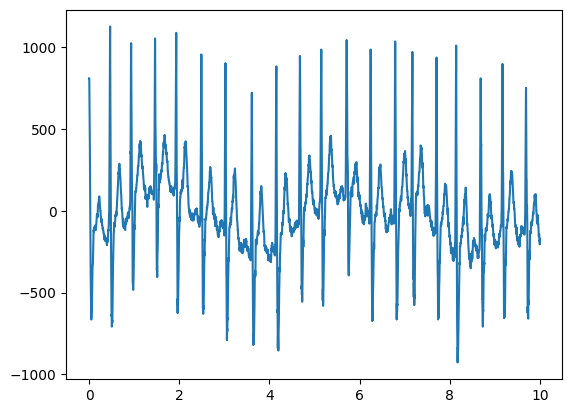

In [11]:
fig01 = plt.figure()
plt.plot(t,lead_10)

In [12]:
ecg_fft = np.fft.fft(lead_10)
ecg_fft

array([ -50343.             +0.j        ,
        -44427.87292792 -48118.33430899j,
        -14003.60280291-331886.8477886j , ...,
       -134619.87742102 -46991.97629606j,
        -14003.60280291+331886.8477886j ,
        -44427.87292792 +48118.33430899j])

In [13]:
mag_ecg_fft = np.abs(ecg_fft)
f_vect = np.fft.fftfreq(len(mag_ecg_fft))

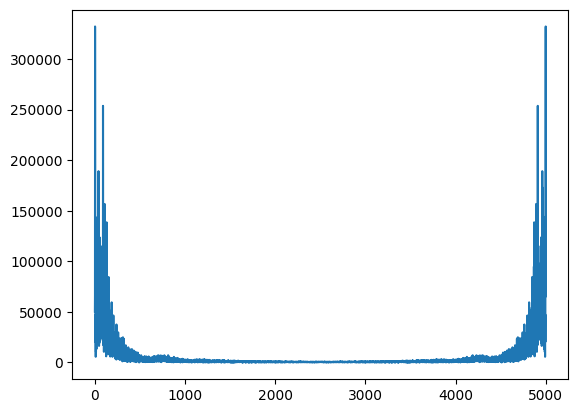

In [14]:
plt.plot(mag_ecg_fft)

In [15]:
N = len(mag_ecg_fft)
f_vect1 = 500*f_vect[:np.uint(N/2)]
mag_ecg_fft1 = mag_ecg_fft[:np.uint(N/2)]

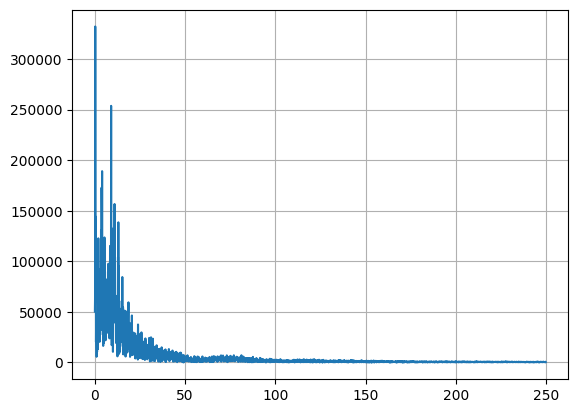

In [16]:
plt.plot(f_vect1, mag_ecg_fft1)
plt.grid()

In [43]:
fs =  500

fc1 = 0.5
fc2 = 50
order_fir = 51

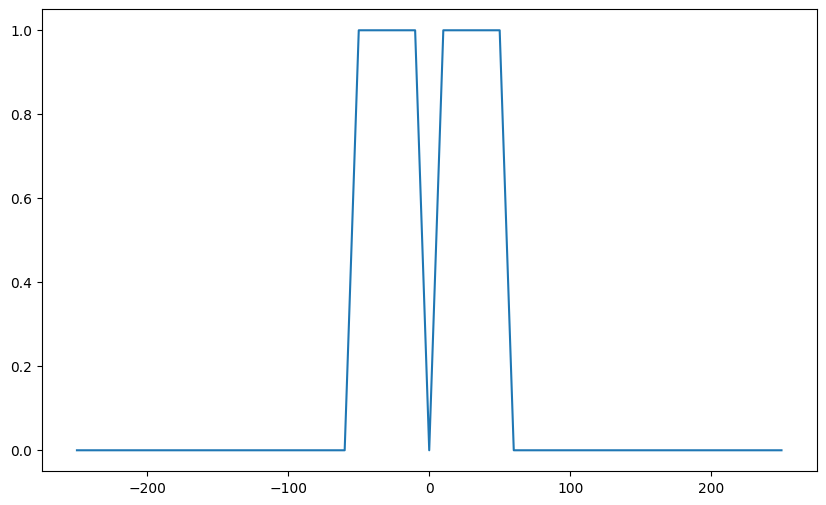

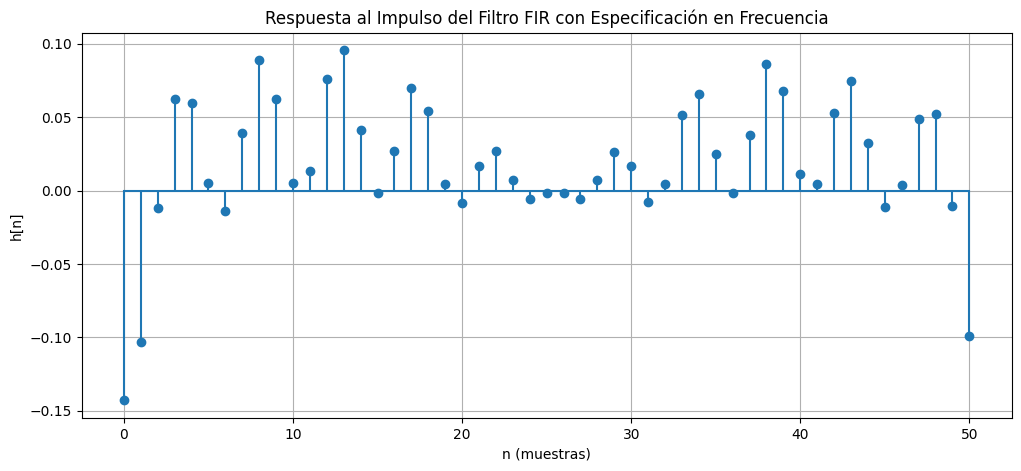

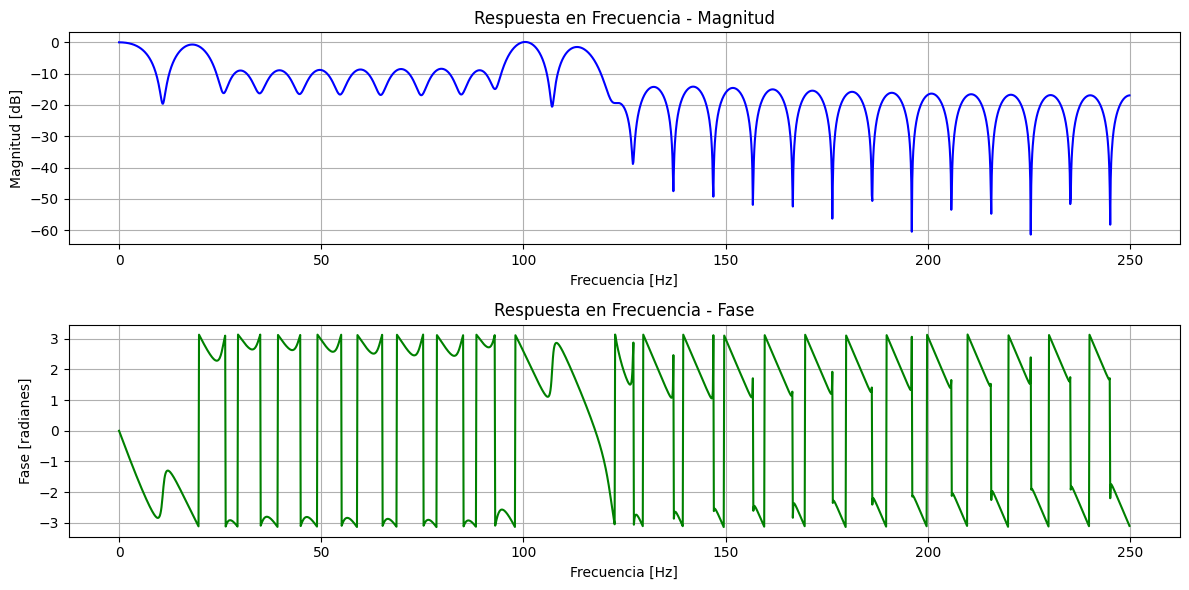

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, windows


# Definir el vector de frecuencias
f_vect = np.linspace(-fs//2, fs//2, order_fir)

# Definir la respuesta en frecuencia deseada
H1 = np.zeros(len(f_vect))
H1[(((f_vect >= 0.5) & (f_vect <= 50)) | ((f_vect <= -0.5) & (f_vect >= -50)))] =  1  # Banda de paso entre 0.5 y 50 Hz

plt.figure(figsize=(10,6))
plt.plot(f_vect, H1)

# Normalizar las frecuencias con respecto a Nyquist (fs/2)
normalized_frequencies = f_vect / (fs / 2)

# Interpolación de la respuesta deseada
H_interp = np.interp(np.linspace(0, 1, order_fir), normalized_frequencies, H1)

# Transformada Inversa de Fourier para obtener la respuesta al impulso
h = np.fft.ifft(H_interp, order_fir).real  # Solo tomamos la parte real

# Aplicar ventana de Hamming
window = windows.hamming(order_fir)
h_windowed = h * window

# Normalizar la energía del filtro
h_windowed /= np.sum(h_windowed)

# Calcular la respuesta en frecuencia
w, H_fir = freqz(h_windowed, worN=2048, fs=fs)

# Graficar la respuesta al impulso
plt.figure(figsize=(12, 5))
plt.stem(h_windowed, basefmt="C0")
plt.title("Respuesta al Impulso del Filtro FIR con Especificación en Frecuencia")
plt.xlabel("n (muestras)")
plt.ylabel("h[n]")
plt.grid()
plt.show()

# Graficar la respuesta en frecuencia
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(H_fir)), "b")
plt.title("Respuesta en Frecuencia - Magnitud")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(H_fir), "g")
plt.title("Respuesta en Frecuencia - Fase")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase [radianes]")
plt.grid()

plt.tight_layout()
plt.show()

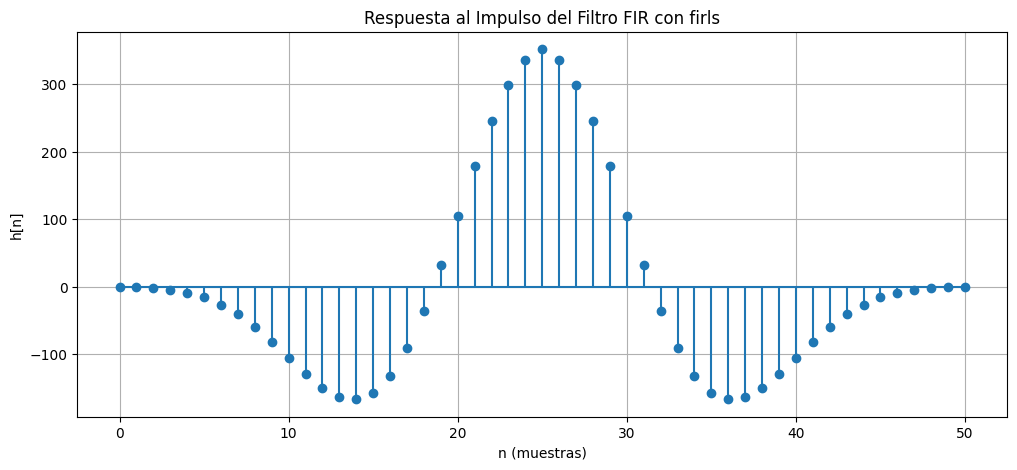

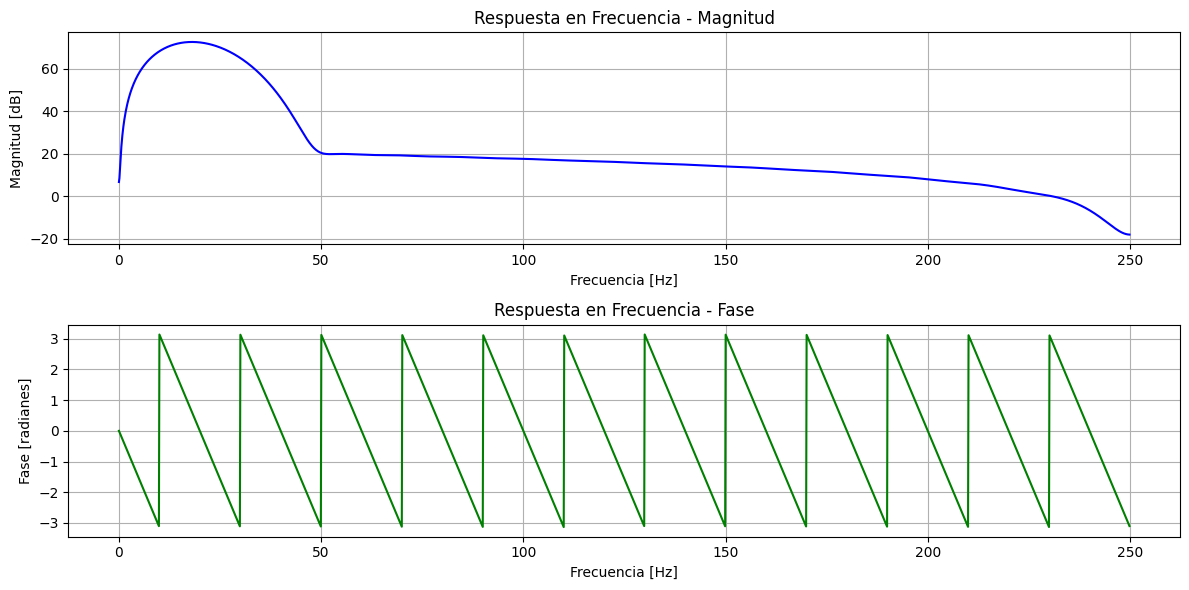

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firls, freqz

# Parámetros del filtro
fs = 500  # Frecuencia de muestreo en Hz
N = 51  # Número de coeficientes del filtro (impar para centrar en cero)

# Definir las bandas y la respuesta deseada
bands = [0, 0.5, 50, fs / 2]  # Frecuencias en Hz
desired = [0, 10, 10, 0]  # Pasa-banda de 0.5 Hz a 50 Hz

# Diseñar el filtro FIR con firls
h_firls = firls(N, bands, desired, fs=fs)

# Calcular la respuesta en frecuencia
w, H_fir = freqz(h_firls, worN=2048, fs=fs)

# Graficar la respuesta al impulso
plt.figure(figsize=(12, 5))
plt.stem(h_firls, basefmt="C0")
plt.title("Respuesta al Impulso del Filtro FIR con firls")
plt.xlabel("n (muestras)")
plt.ylabel("h[n]")
plt.grid()
plt.show()

# Graficar la respuesta en frecuencia
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(H_fir)), "b")
plt.title("Respuesta en Frecuencia - Magnitud")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(H_fir), "g")
plt.title("Respuesta en Frecuencia - Fase")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase [radianes]")
plt.grid()

plt.tight_layout()
plt.show()